# 1 - Concept questions

## Question 1

The main difference between supervised and unsupervised learning is that in supervised learning, the algorithm is provided with labeled data whereas in unsupervised learning, the data is unlabeled. Labeled data means that the input data has corresponding labels or output values that the algorithm can use to make predictions on new data based on any patterns observed in the training data. Unsupervised learning does not use labeled data and so the objective of the algorithm is to find hidden patterns within the data itself.

Benefits of supervised learning:

-	The supervised learning model will generally have a higher accuracy for classification and prediction tasks since the model was trained with labeled data.
-	Supervised learning models tend to be more interpretable because the input and output data are clearly labeled, making it easier to see how the model arrived at its predictions. 

Drawbacks of supervised learning:

-	The task of labeling data or finding accurately labeled data can be expensive and time consuming.
-	The model can be overfit to the training data and perform poorly on unseen data if the training data is not representative enough.

Benefits of unsupervised learning:

-	Valuable insights can be gained from hidden patterns and structures uncovered by the unsupervised learning models. 
-	Unsupervised learning models can scale very well since they can take in large amounts of unlabeled data which is often more readily available and cheaper than labeled data. 

Drawbacks of unsupervised learning:

-	Unsupervised models can be more difficult to interpret since the patterns and relationships uncovered may not have a clear and intuitive explanation. 
-	Since the data is unlabeled, it can be challenging to evaluate the quality or correctness of the model’s outputs. 

## Question 2

Consider a dataset with data points each having 3 features, e.g., $x^1$ = {"Atlanta", "house", 500k}, and $x^2$ = {"San Francisco", "house", 300k}. 

Since two of the three features are categorical (e.g. "Atlanta" for the location and "house" for the type of residence), they can be converted into one-hot-keying binary vectors. The Hamming distance can then be used for the two binary vectors which counts the number of positions where the corresponding bits differ in the two vectors. 

For the real-valued features (e.g. 500k as the price of a property), the Euclidean distance can be used. To combine the two distance measures, I can use a weighted sum of the Hamming distance for categorical features and the Euclidean distance for real-valued features. 

The one-hot-keying encoding can be as follows: $Atlanta = 0, San Francisco = 1, house = 0$

This results in the following modified vectors:
$$x^1 = [0, 0, 500000]$$ 
$$x^2 = [1, 0, 300000]$$

Using Hamming distance for the first two features of each vector, we get 1 since the only the first feature differs ("Atlanta" vs "San Francisco"). 

Using the Euclidean distance for the third feature:
$$
\begin{split}
d(x,y) &= \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2} \\
d(500k, 300k) &= \sqrt{(500000 - 300000)^2} \\
d(500k, 300k) &= 200000
\end{split}
$$

Using weights of 0.8 for categorical features and 0.2 for real-valued features, the similarity measure equals:
$$(0.8 * 1) + (0.2 * 200000) = 40000.8$$ 

Therefore, a proper similarity function for this kind of data could be,
$$
\begin{split}
d(x^i, x^j) = 0.8 &* \text{Hamming distance of categorical features} (x^i, x^j) \\
+ 0.2 &* \text{Euclidean distance of real value features} (x^i, x^j)
\end{split}
$$ 

This function is a reasonable choice because it captures both the categorical and numerical aspects of the data which are important for accurately measuring the similarity between data points. I chose to give more weight to the categorical features in this particular case because the location, which determines cost of living, as well as the residence type, tend to matter more than their property value which can fluctuate over time. However, other approaches can also be taken like normalizing each of the distance functions by the number of features in each category before summing them up with different weights. By combining the Hamming distance for categorical features and Euclidean distance for numerical features, the relative importance of the categorical and numerical features can be balanced using a weighted sum.


## Question 3

The clustering assignment problem $\pi(i) = \arg\min_{j=1, \ldots, k} \|x^i- c^j\|^2$ is equivalent to solving, $\pi(i) = \arg \min_{j=1, \ldots, k} (c^j)^T\left(\frac 1 2 c^j-x^i\right)$.

Expanding the squared Euclidean distance:
$$
\|x^i - c^j\|^2 = (x^i - c^j)^T (x^i - c^j) = (x^i)^T x^i - 2 (x^i)^T c^j + (c^j)^T c^j
$$

Since $(x^i)^T x^i$ is a constant with respect to the cluster assignments $j$, it does not affect the minimization. Therefore, I can drop this term when considering the minimization problem:

$$
\pi(i) = \arg\min_{j=1, \ldots, k} \left[ -2 (x^i)^T c^j + (c^j)^T c^j  \right]
$$


Factoring out the scalar 2 in $(x^i)^T c^j$ and rearranging terms:
$$
\pi(i) = \arg\min_{j=1, \ldots, k} \left[ - (x^i)^T c^j + \frac{1}{2} (c^j)^T c^j \right]
= \arg\min_{j=1, \ldots, k} \left[ \frac{1}{2} (c^j)^T c^j - (x^i)^T c^j \right]
$$

This is because minimizing a function of the form $a x + b$ is equivalent to minimizing $\frac{1}{2} a x + b$ since the coefficient $\frac{1}{2}$ does not change the location of the minimum.

Grouping terms differently:
$$
\pi(i) = \arg\min_{j=1, \ldots, k} \left[ (c^j)^T \left(\frac{1}{2} c^j - x^i\right) \right]
$$

Therefore, this is equivalent to solving:
$$
\pi(i) = \arg\min_{j=1, \ldots, k} (c^j)^T \left(\frac{1}{2} c^j - x^i\right)
$$

The supplementary lecture 2 resource file, Mediod in squared $l_2$ norm by Yao Xie, was helpful in expanding the equations.

## Question 4 

Different initializations for the k-means algorithm can lead to different results because the algorithm iteratively refines the cluster assignments based on the initial centroid positions. If the initial centroids are poorly placed, the algorithm may converge to a local optimum which might not represent the global optimal clustering. Additionally, the order in which data points are processed can also influence the final cluster assignments. Random initialization and outliers in the data can also cause variability between runs. 

## Question 5

The k-means algorithm is guaranteed to stop after a finite number of iterations because there is a finite number of ways to assign data points to clusters. In each iteration, either the cluster assignments remain the same which causes convergence, or the sum of squared distances between data points and their assigned cluster centroids decreases.
The sum of squared distances cannot decrease indefinitely since it is often bounded by a very small value close to zero. Therefore, the algorithm will eventually converge to a solution where further iterations do not result in any changes and no reassignment of data points to different clusters is possible. 

## Question 6

Consider the following graph.

![Graph](plot.pdf)

The adjacency matrix, $A$, and the degree matrix, $D$, need to be created first to create the graph Laplacian matrix, $L$.

- The adjacency matrix can be made using the follow rule below.
$$
A_{ij} = \begin{cases}
    1, & \text{if there is an edge from i to j} \\
    0, & \text{otherwise.}
\end{cases}
$$
$$
A = \begin{pmatrix}
    0 & 1 & 1 & 0 & 0 \\
    1 & 0 & 1 & 0 & 0 \\
    1 & 1 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 & 1 \\
    0 & 0 & 0 & 1 & 0 \\
\end{pmatrix}
$$

- The degree matrix is a diagonal matrix that simply counts the number of edges for each node.
$$
D = \begin{pmatrix}
    2 & 0 & 0 & 0 & 0 \\
    0 & 2 & 0 & 0 & 0 \\
    0 & 0 & 2 & 0 & 0 \\
    0 & 0 & 0 & 1 & 0 \\
    0 & 0 & 0 & 0 & 1 \\
\end{pmatrix}
$$ 

- The graph Laplacian matrix is positive semi-definite and measures to what extent a graph differs at one node from its values at nearby vertices.

$$
L = D - A = \begin{pmatrix}
    2 & -1 & -1 & 0 & 0 \\
    -1 & 2 & -1 & 0 & 0 \\
    -1 & -1 & 2 & 0 & 0 \\
    0 & 0 & 0 & 1 & -1 \\
    0 & 0 & 0 & -1 & 1
\end{pmatrix}
$$

The code cell below performs eigendecomposition on $L$ to find eigenvectors corresponding to the eigenvalue 0. 

In [1]:
import numpy as np 

A = np.array([[0, 1, 1, 0, 0],
              [1, 0, 1, 0, 0],
              [1, 1, 0, 0, 0],
              [0, 0, 0, 0, 1],
              [0, 0, 0, 1, 0]])
D = np.diag(A.sum(axis=1))
L = D - A

eigenvalues, eigenvectors = np.linalg.eig(L)
zero_eigenvalues = np.where(np.abs(eigenvalues) < 1e-10)[0]
zero_eigenvectors = eigenvectors[:, zero_eigenvalues]

In [2]:
#| echo: false
print("Eigenvectors corresponding to zero eigenvalues:\n", zero_eigenvectors)

Eigenvectors corresponding to zero eigenvalues:
 [[-0.57735027  0.        ]
 [-0.57735027  0.        ]
 [-0.57735027  0.        ]
 [ 0.          0.70710678]
 [ 0.          0.70710678]]


The multiplicity of the eigenvalue 0 corresponds to the number of connected components or clusters in the graph. As seen from the output above, rows 1, 2, and 3 are identical while rows 4 and 5 are different from the other rows but identical to each other. These means that there are two distinct clusters. One cluster has the nodes [1, 2, 3] and the other cluster has the nodes [4, 5].

# 2 - Math of k-means clustering

Given $m$ data points $\text x^i \in \mathbb R^{n}$, $i=1,\dots, m$, $K$-means clustering algorithm groups them into $k$ clusters by minimizing the distortion function over $\{ r^{ij}, \mu^j \}$
$$
J =\sum_{i=1}^m\sum_{j=1}^k r^{ij} \|\text x^i-\mu^j\|^2,
$$
where $r^{ij}=1$ if $\text x^i$ belongs to the $j$-th cluster and $r^{ij}=0$ otherwise.

## Question 1

It can be shown that using the squared Euclidean distance $\|\text x^i-\mu^j\|^2$ as the dissimilarity function, where $\mu^j$ is the center of $j$-th cluster, the centroid that minimizes the distortion function $J$  for given assignments $r^{ij}$ are given by
$$\mu^j=\frac{\sum_i r^{ij} \text x^i}{\sum_i r^{ij}}.$$
The derivation steps are shown below.

The distortion function can be minimized by taking the partial derivative of $J$ with respect to $\mu^j$, with $r^{ij}$ fixed, and setting it equal to 0:
$$
J =\sum_{i=1}^m\sum_{j=1}^k r^{ij} \|\text x^i-\mu^j\|^2 
$$
$$
\frac{\partial J}{\partial \mu^j} = -2\sum_{i=1}^m r^{ij} (\text x^i - \mu^j) = 0
$$
Solving for $\mu^k$:
$$
\begin{split}
&\Rightarrow -2\sum_{i=1}^m r^{ij} \text x^{i} + 2\sum_{i=1}^m r^{ij} \mu^{j} = 0 \\
&\Rightarrow \sum_{i=1}^m r^{ij} \text x^{i} = \sum_{i=1}^m r^{ij} \mu^{j} \\
&\Rightarrow \mu^{j} = \frac {\sum_{i=1}^m r^{ij} \text x^{i}} {\sum_{i=1}^m r^{ij}}
\end{split}
$$

## Question 2

The assignment variables $r^{ij}$ can also be derived to minimize the distortion function $J$ when the centroids $\mu^j$ are fixed.

To do this, each data point $\text x^i$ can be assigned to the nearest centroid $\mu^j$. The assignment variable $r^{ij}$ is set to 1 if the $j$-th centroid is the closest to the $i$-th data point and 0 otherwise. For $i = 1,...,m$, this can be formulated as:
$$
r^{ij} = \begin{cases} 
1 & \text{if } j = \underset{l = 1, ..., k}{\text{argmin}} \|\text x^i - \mu^l\|^2 \\
0 & \text{otherwise.}
\end{cases}
$$
This rule makes sure that each data point is assigned to the nearest centroid which ultimately minimizes the distortion function $J$. 

## Question 3

Now for the question above, suppose the similar score is changed to a "quadratic" distance (also known as the Mahalanobis distance) for given and fixed positive definite matrix  $\Sigma \in \mathbb R^{n\times n}$, and the distortion function becomes:
$$
J =\sum_{i=1}^m\sum_{j=1}^k r^{ij} (\text x^i-\mu^j)^T \Sigma  (\text x^i-\mu^j),
$$
The $\mu^{j}$ and $r^{ij}$ can be derived as shown below.

**Optimal assignment variables $r^{ij}$:**

Similar to question 2, the assignment variable $r^{ij}$ can be determined by assigning each data point $\text x^i$ to the nearest centroid $\mu^j$ based on the quadratic distance by the matrix $\Sigma$. This can be formulated as:
$$
r^{ij} = \begin{cases} 
1 & \text{if } j = \underset{l}{\text{argmin}} (\text x^i - \mu^l)^T \Sigma (\text x^i - \mu^l) \\
0 & \text{otherwise}
\end{cases}
$$
Here, $r^{ij}$ is set to 1 if the $j$-th centroid is the closest to the $i$-th data point based on the Mahalanobis distance defined by $\Sigma$, and 0 otherwise.

**Optimal centroid $\mu^{j}$:**

To find the optimal centroid $\mu^j$, the distortion function can be minimized by taking the partial derivative of $J$ with respect to $\mu^j$ and setting it equal to 0:
$$ 
J =\sum_{i=1}^m\sum_{j=1}^k r^{ij} (\text x^i-\mu^j)^T \Sigma  (\text x^i-\mu^j) \\
\frac{\partial J}{\partial \mu^j} = -2 \Sigma \sum_{i=1}^m r^{ij}  (\text x^i - \mu^j) = 0
$$
Solving for $\mu^j$:
$$
\begin{split}
&\Rightarrow -2 \Sigma \sum_{i=1}^m r^{ij} (\text x^i - \mu^j) = 0 \\
&\Rightarrow -2 \Sigma \sum_{i=1}^m r^{ij} \text x^{i} + 2 \Sigma \sum_{i=1}^m r^{ij} \mu^{j} = 0 \\
&\Rightarrow \sum_{i=1}^m r^{ij} \text x^i = \sum_{i=1}^m r^{ij} \mu^j\\
&\Rightarrow \mu^j = \frac{\sum_{i=1}^m r^{ij} \text x^i}{\sum_{i=1}^m r^{ij}} \\
\end{split}
$$

# 3 - Image compression using clustering

## Questions 1 and 2
The k-means algorithm with squared-$l_2$ norm as a metric was coded to take `pixels` and `k` as an input and return `class` and `centroid` as the outputs.

- `pixels` is the numeric representation of a supplied image where each row contains a pixel with 3 columns, each corresponding to Red, Green, and Blue values between 0 and 255.
- `k` is the number of desired clusters.
- `class` holds the cluster labels for each data point in pixels.
- `centroid` is a NumPy array that has the location of the $k$ centroids.

The full code can be found in the zip file attached with this assignment. 

In [3]:
#| echo: false

#load libraries
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import time


In [4]:
#| echo: false

# read_img function is from CSE 6040 homework
def read_img(filename):
    img = Image.open(filename)
    img_arr = np.array(img)
    img.close()
    return img_arr

def update_centroids(pixels, cluster_nums, k, d, l_norm):
    updated_centroids = np.full((k, d), np.nan)
    empty_clusters = []
    obj = 0

    for centroid_id in range(k):
        pixel_inds = np.where(cluster_nums == centroid_id)
        cluster_members = pixels[pixel_inds]

        # initial idea was to reintialize clusters with no data points (the demo code provided does something similar)
        # after Mark Patrick's feedback on Ed, I will just reduce the # of clusters instead

        # handle empty clusters
        if len(cluster_members) == 0:
            empty_clusters.append(centroid_id)
            # updated_centroids[centroid_id] = np.random.randint(0, 255, size=(1, 3))
        else:
            if l_norm == 2:
                updated_centroids[centroid_id] = np.mean(cluster_members, axis = 0)
            
                dist_metric = np.linalg.norm(cluster_members - updated_centroids[centroid_id], axis = 1) #objective function
                obj += np.sum(np.square(dist_metric))

            elif l_norm == 1:
                updated_centroids[centroid_id] = np.median(cluster_members, axis = 0)

                dist_metric = np.sum(np.abs(cluster_members - updated_centroids[centroid_id]), axis = 1) #objective function
                obj += np.sum(dist_metric)
    
    return updated_centroids, empty_clusters, obj

def check_convergence(obj, prev_obj, iter_count, k):
    if obj == prev_obj:
        print(f"K = {k} ({iter_count} iterations)")
        return True
    return False

def k_means(pixels, k, l_norm=2):
    m, n, d = pixels.shape
    pixels = np.reshape(pixels, (m*n, d))
    
    if l_norm == 2:
        arg = "euclidean"
    elif l_norm == 1:
        arg = "cityblock" # manhattan distance
    
    # randomly intilize centroids 
    # (faster, works well, reduces clusters as necessary)
    centroids = np.random.randint(0, 255, size=(k, d))

    # another way to initialize centroids by randomly selecting k data points from the input data 
    # (slower, similar results to above, does not reduce clusters)
    # centroids = pixels[np.random.choice(m*n, k, replace=False)]

    iter_count = 0
    prev_obj = -np.inf
    converged = False
    while not converged:
        iter_count += 1

        # using cdist is significantly faster than looping through each pixel to get distance 
        # (credit to Liam ODonnell on Ed)
        dist = cdist(pixels, centroids, arg)
        cluster_nums = np.argmin(dist, axis=1)

        updated_centroids, empty_clusters, obj = update_centroids(pixels, cluster_nums, k, d, l_norm)

        # reduce the number of clusters if there are empty clusters
        if len(empty_clusters) > 0:
            updated_centroids = np.delete(updated_centroids, empty_clusters, 0)
            k -= len(empty_clusters)

        converged = check_convergence(obj, prev_obj, iter_count, k)

        # if not converged, reinitialize variables for another iteration
        prev_obj = obj
        centroids = updated_centroids

    # reassign points to final clusters
    dist = cdist(pixels, centroids, arg)
    cluster_labels = np.argmin(dist, axis = 1)
    final_k = k
    return cluster_labels, centroids, iter_count, obj, final_k

def process_images(original_img, labels, centroids, m, n, k, final_k, name, elapsed_time, iter_count):
    compressed_img = centroids[labels].reshape((m, n, -1))
    fig, axs = plt.subplots(1, 2, figsize = (10, 5))
    
    axs[0].set_title("Original Image")
    axs[0].imshow(original_img)
    axs[0].axis("off")
    
    axs[1].set_title(f"Compressed Image (K = {final_k})")
    axs[1].imshow(compressed_img.astype(np.uint8))
    axs[1].axis("off")
    
    axs[0].text(0.5, -0.05, f"Image name: {name}\nImage dimensions: {m} x {n}", 
                ha = "center", va = "top", transform = axs[0].transAxes, fontsize = 12)
    axs[1].text(0.5, -0.05, f"Elapsed time: {elapsed_time:.2f} seconds\nInitial K: {k} | Iterations: {iter_count}", 
                ha = "center", va = "top", transform = axs[1].transAxes, fontsize = 12)

    # save the compressed image to a folder
    if not os.path.exists("kmeans_images"):
        os.makedirs("kmeans_images")
    
    # compressed_image_path = os.path.join("kmeans_images", f"{name}_k{k}.jpeg")
    plt.savefig(f"kmeans_images/{name.split('.')[0]}_(k_{k}).jpeg")
    plt.show()

---------------------------------------------
Running K-Means Clustering...
Image: Glockenbronze.png 
Dimensions: 819 x 1024
K = 2 (14 iterations)
	-> Elapsed time: 0.85 seconds
	-> Class: [1 1 0 ... 1 1 1]
	-> Centroids:
	[[218.89 192.36 170.01], [138.47  99.33  87.28]]


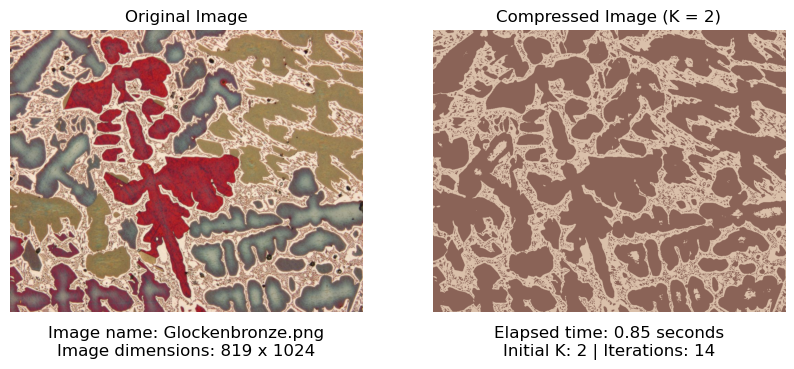

K = 5 (31 iterations)
	-> Elapsed time: 2.24 seconds
	-> Class: [2 2 1 ... 3 3 2]
	-> Centroids:
	[[146.17  42.4   53.43], [194.09 163.66 142.4 ], [151.35 127.97  98.23]]
	[[110.81  95.36  92.53], [233.94 210.28 187.32]]


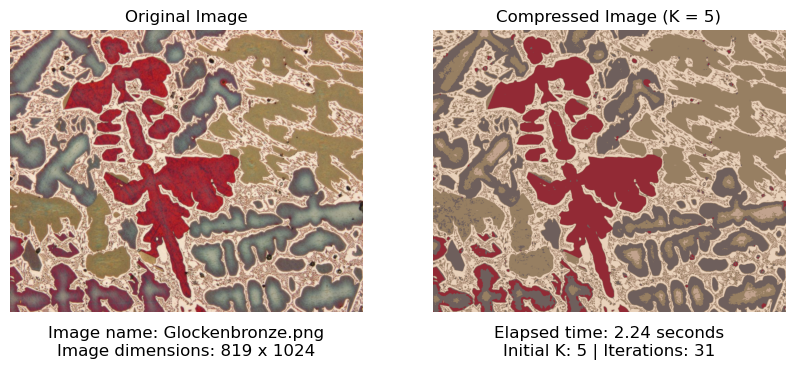

K = 7 (61 iterations)
	-> Elapsed time: 6.71 seconds
	-> Class: [5 5 4 ... 1 1 6]
	-> Centroids:
	[[147.21  41.9   53.08], [109.38  90.63  89.29], [211.77 181.33 159.32]]
	[[237.18 214.79 191.69], [180.   149.72 128.89], [125.96 128.79 119.21]]
	[[152.94 123.96  88.31]]


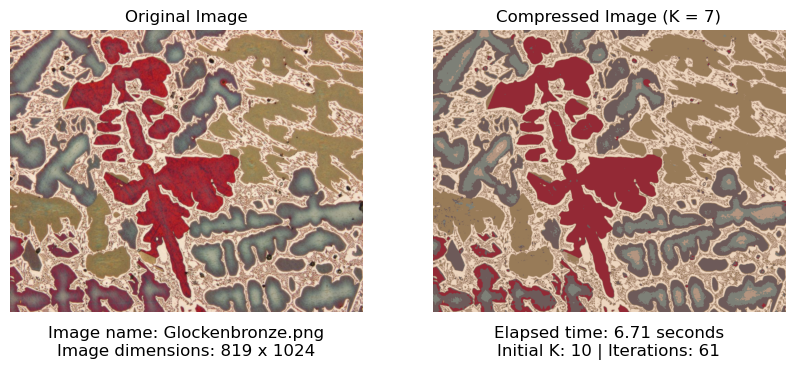

K = 13 (75 iterations)
	-> Elapsed time: 12.79 seconds
	-> Class: [ 9  6  4 ...  3  3 12]
	-> Centroids:
	[[169.52 133.43 110.18], [226.07 198.72 175.91], [207.76 176.61 154.82]]
	[[107.59  85.18  84.66], [188.09 155.38 134.18], [77.5  48.07 42.44]]
	[[144.52 148.02 132.84], [111.78 102.42  98.98], [156.82  37.    48.28]]
	[[122.06 125.16 116.64], [239.95 219.03 195.93], [130.77  52.66  63.9 ]]
	[[150.69 123.08  85.29]]


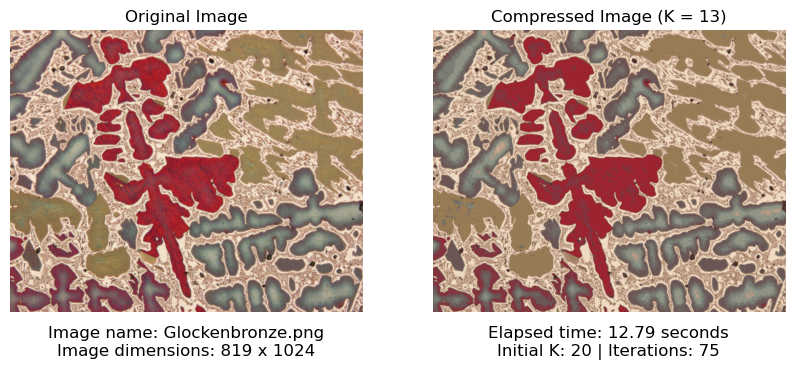

K = 17 (84 iterations)
	-> Elapsed time: 10.01 seconds
	-> Class: [11 15  8 ...  4 14 14]
	-> Centroids:
	[[138.82  36.28  49.25], [120.72  57.86  69.03], [154.5  127.17  87.2 ]]
	[[230.65 204.76 181.64], [106.77  86.95  86.28], [72.46 47.04 40.2 ]]
	[[240.93 220.62 197.58], [184.6  150.9  129.77], [200.49 168.6  147.01]]
	[[163.11  35.76  46.52], [149.06  53.65  62.59], [123.1  126.62 117.7 ]]
	[[168.62 132.25 109.93], [110.06 103.97 101.2 ], [139.86 111.03  82.25]]
	[[145.59 149.07 133.58], [216.3  186.63 164.43]]


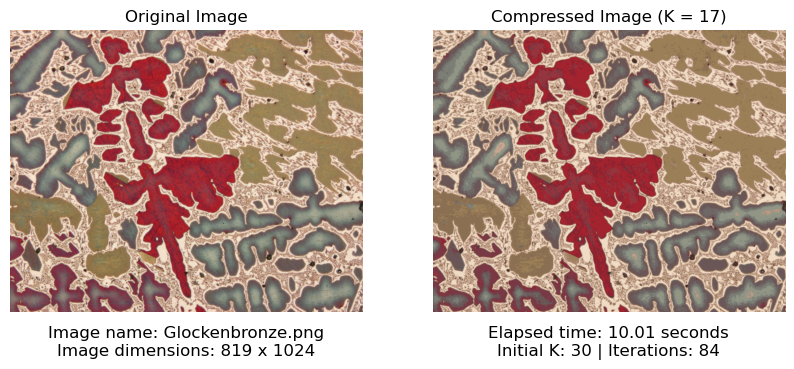

---------------------------------------------
Running K-Means Clustering...
Image: football.bmp 
Dimensions: 412 x 620
K = 2 (18 iterations)
	-> Elapsed time: 0.38 seconds
	-> Class: [1 1 1 ... 1 1 1]
	-> Centroids:
	[[189.91 182.65 172.46], [74.59 76.05 66.44]]


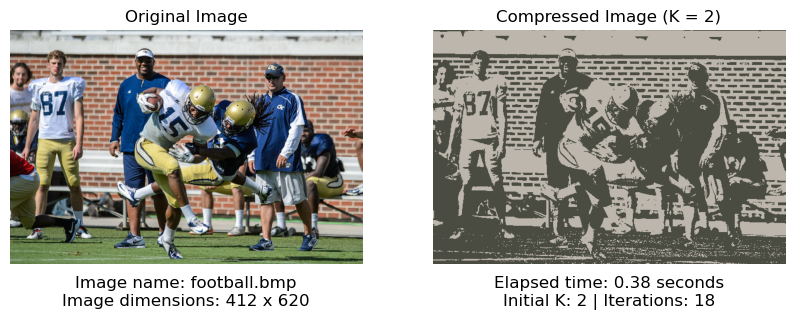

K = 5 (25 iterations)
	-> Elapsed time: 0.6 seconds
	-> Class: [3 3 3 ... 2 2 2]
	-> Centroids:
	[[213.4  218.34 221.68], [184.31 169.64 152.17], [132.31 123.07  95.11]]
	[[59.17 73.45 82.87], [28.6  28.95 26.02]]


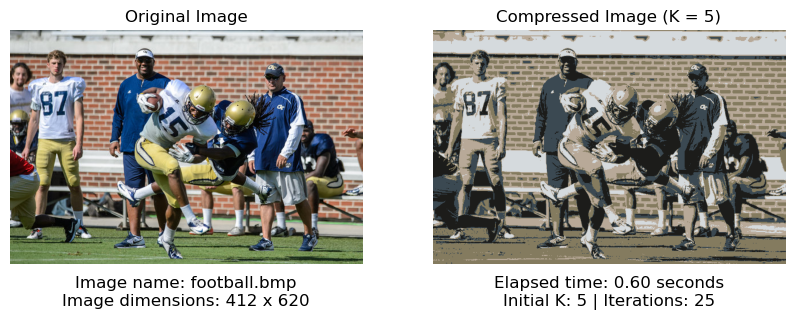

K = 9 (91 iterations)
	-> Elapsed time: 2.34 seconds
	-> Class: [8 8 8 ... 1 1 8]
	-> Centroids:
	[[161.88 111.79  87.38], [120.69 137.83 113.07], [186.9  164.72 138.6 ]]
	[[62.57 59.47 43.31], [188.05 187.78 186.57], [219.64 224.48 227.43]]
	[[19.95 21.54 22.74], [ 24.06  63.81 116.83], [ 98.04 101.41  78.22]]


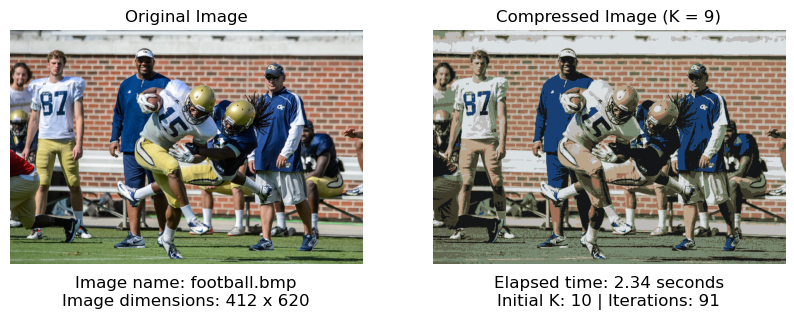

K = 18 (155 iterations)
	-> Elapsed time: 5.27 seconds
	-> Class: [ 9  9  9 ... 17 17 17]
	-> Centroids:
	[[100.64 124.37 159.99], [15.32 15.85 16.28], [106.39 101.35  70.01]]
	[[176.22 143.62 116.52], [204.52 210.71 215.69], [227.95 232.14 234.66]]
	[[186.27 187.52 187.08], [72.4  69.52 51.  ], [118.98 120.75 120.57]]
	[[78.7  91.02 98.47], [ 22.95  68.41 127.99], [15.85 39.35 73.64]]
	[[192.86 167.56 152.21], [148.86 157.59 155.99], [217.55 201.85 129.54]]
	[[47.05 42.85 28.45], [160.46 105.46  82.76], [120.01 143.12  88.68]]


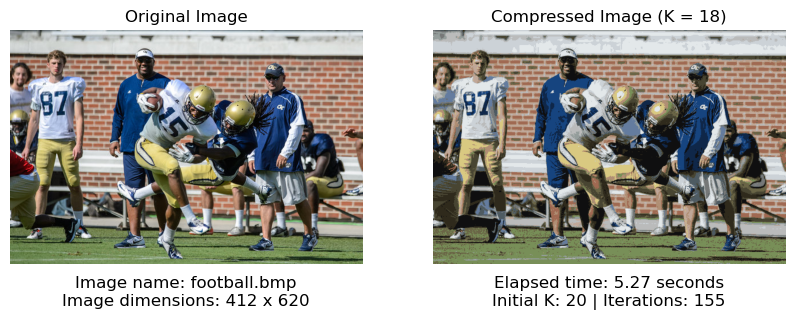

K = 20 (80 iterations)
	-> Elapsed time: 2.89 seconds
	-> Class: [ 9  9  9 ... 15 15 19]
	-> Centroids:
	[[43.03 41.32 27.69], [215.45 201.58 125.91], [172.78 137.04 110.33]]
	[[165.46 175.86 184.77], [156.46 103.68  81.47], [226.34 230.58 232.95]]
	[[15.1  40.02 75.88], [200.17 206.76 212.11], [66.98 64.9  47.5 ]]
	[[92.03 87.36 69.14], [14.2  15.48 16.34], [174.04  27.3   33.84]]
	[[ 91.57 104.56 116.47], [122.91 135.26 150.89], [198.47 182.06 169.68]]
	[[126.69 147.9   97.05], [183.77 160.01 142.36], [66.25  9.34  8.75]]
	[[ 25.13  69.68 128.5 ], [109.72 128.23  78.46]]


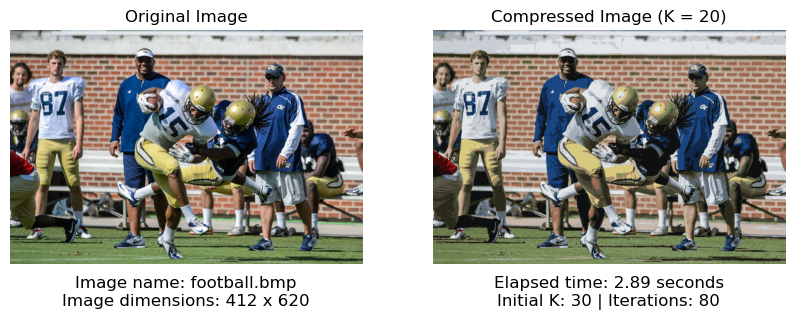

---------------------------------------------
Running K-Means Clustering...
Image: abstract.jpg 
Dimensions: 1200 x 1200
K = 2 (21 iterations)
	-> Elapsed time: 2.27 seconds
	-> Class: [1 1 1 ... 0 0 0]
	-> Centroids:
	[[199.5  138.9  112.02], [ 81.73  50.18 116.7 ]]


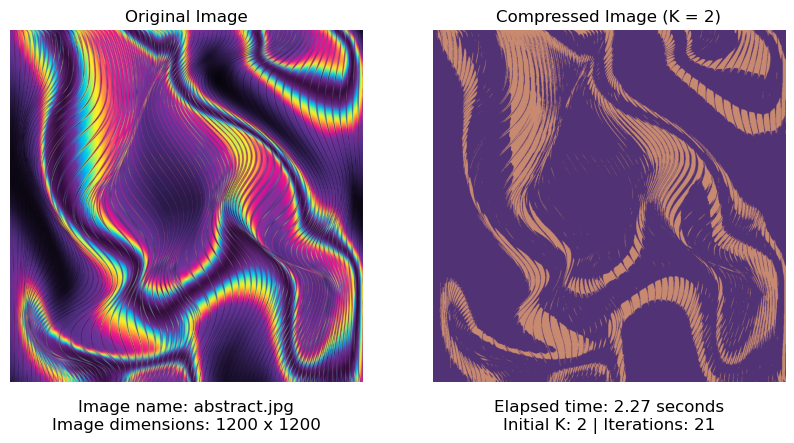

K = 5 (23 iterations)
	-> Elapsed time: 2.98 seconds
	-> Class: [4 4 4 ... 2 2 2]
	-> Centroids:
	[[ 71.   171.77 185.82], [219.31 195.27  83.3 ], [200.93  61.6  127.08]]
	[[49.74 24.07 69.67], [ 99.81  53.94 133.52]]


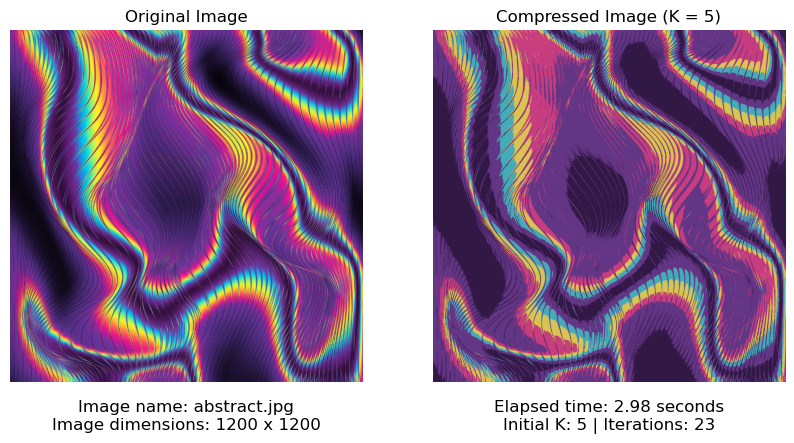

K = 10 (91 iterations)
	-> Elapsed time: 14.43 seconds
	-> Class: [8 7 5 ... 9 9 9]
	-> Centroids:
	[[ 45.3  182.66 205.09], [32.63 16.35 48.65], [232.97 212.79  67.47]]
	[[143.35 209.68 137.42], [228.14 121.09  95.67], [67.71 33.07 91.62]]
	[[ 83.61 108.3  165.73], [ 95.14  50.56 134.82], [145.11  59.2  137.08]]
	[[214.43  42.16 132.5 ]]


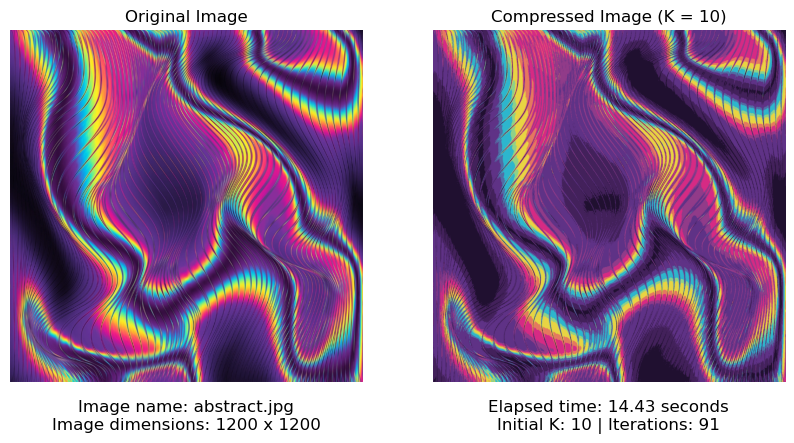

K = 19 (356 iterations)
	-> Elapsed time: 75.54 seconds
	-> Class: [18  5  9 ...  8  8  8]
	-> Centroids:
	[[22.74 13.04 37.07], [178.88 223.25 111.23], [113.47  62.75  61.47]]
	[[240.16 156.79  81.19], [238.91 220.97  56.87], [ 96.34  50.63 138.45]]
	[[ 80.31  90.54 164.77], [240.21  92.17 103.79], [223.09  36.6  133.66]]
	[[ 76.18  38.41 108.51], [166.   133.47 147.73], [106.24 211.85 161.2 ]]
	[[175.26  44.7  139.96], [ 62.33 136.13 194.1 ], [171.92  97.65  95.28]]
	[[ 32.5  190.8  212.78], [53.11 23.94 75.91], [111.94  98.47 131.68]]
	[[133.15  50.71 143.77]]


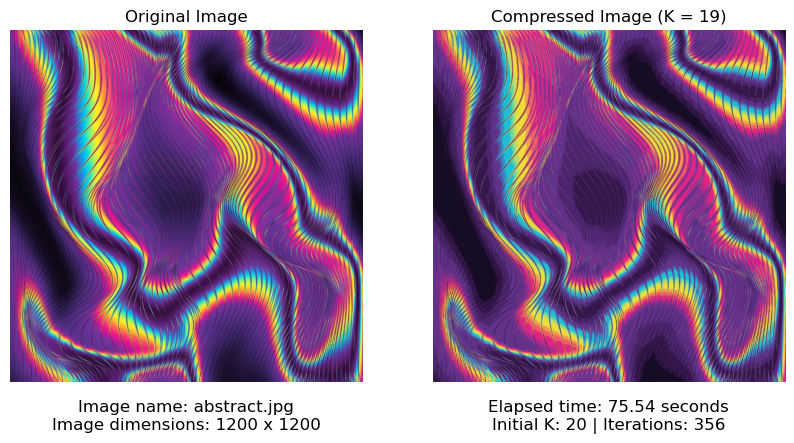

K = 28 (121 iterations)
	-> Elapsed time: 31.29 seconds
	-> Class: [18  9 11 ...  2  2  2]
	-> Centroids:
	[[44.83 20.46 65.5 ], [246.09 148.98  72.37], [228.57  38.36 130.88]]
	[[185.99  33.67 145.16], [166.93 116.15  86.1 ], [ 64.22 208.27 188.69]]
	[[ 88.6   46.8  128.43], [108.81 154.4  155.31], [ 24.04 182.8  219.98]]
	[[126.42  44.11 103.12], [127.79  89.   140.21], [ 75.25  38.02 108.42]]
	[[ 57.88 132.95 197.87], [240.72  92.82 103.06], [114.3  221.89 155.93]]
	[[19.59 11.43 32.48], [179.32  67.68 121.18], [221.13 179.1  107.97]]
	[[139.08  48.21 147.02], [61.38 28.   87.27], [204.72 233.51  84.46]]
	[[ 80.65  91.58 166.61], [107.26  64.75  46.75], [177.06 126.42 150.17]]
	[[102.63  52.85 145.67], [ 83.51  90.91 110.02], [161.49 221.82 123.61]]
	[[244.95 217.63  50.86]]


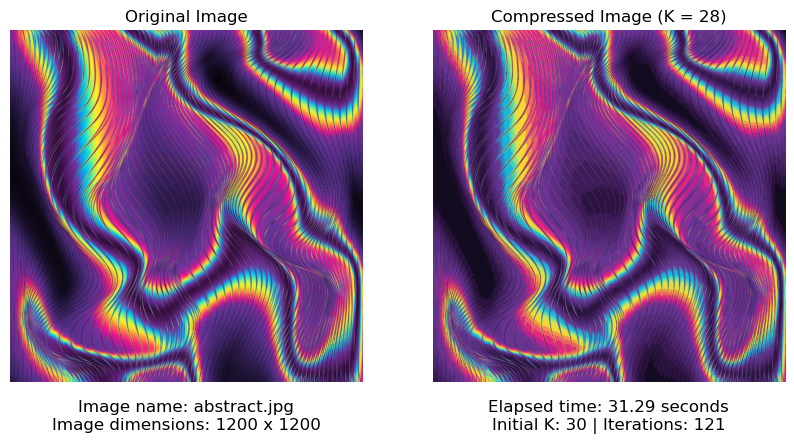

In [5]:
#| echo: false

# random seed to ensure reproducibility 
np.random.seed(123456)

k_values = [2, 5, 10, 20, 30]
img_list = ["Glockenbronze.png", "football.bmp", "abstract.jpg"]

# additional images tested. outputs can be found in the "kmeans_images" folder
# img_list = ["starry_night.jpg", "doggo.png", "gt_bee.jpg"]

for image in img_list:
    img_arr = read_img(f"data/{image}")
    m, n, d = img_arr.shape
    print("-"*45)
    print(f"Running K-Means Clustering...\nImage: {image} \nDimensions: {m} x {n}")
    
    obj_values = []
    final_k_values = []

    for k_val in k_values:
        start_time = time.time()
        labels, centroids, iter_count, obj, final_k = k_means(img_arr, k_val, l_norm=2)
        end_time = time.time()
        elapsed_time = end_time - start_time
        obj_values.append(obj)
        final_k_values.append(final_k)

        print("\t-> Elapsed time:", round(elapsed_time, 2), "seconds")
        print("\t-> Class:", labels)
        # print("\t-> Class size:", labels.shape)
        # print("\t-> Centroid matrix size:", centroids.shape)
        print("\t-> Centroids:")

        # prints 3 at a time so it doesn't overflow the page when printing to pdf
        for i in range(0, len(centroids), 3):
            print(f"\t[{', '.join(f'{np.round(x, 2)}' for x in centroids[i:i+3])}]")
        
        process_images(img_arr, labels, centroids, m, n, k_val, final_k, image, elapsed_time, iter_count)

    # plots the obj values vs k values to find optimial k 
    plt.figure(figsize = (6, 4))
    plt.plot(final_k_values, obj_values, marker = "o")
    plt.xticks(final_k_values)
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Objective Function Value (WCSS)")
    plt.title(f"WCSS vs K for {image}")
    plt.grid(True)
    plt.savefig(os.path.join("kmeans_images", f"{image.split('.')[0]}_wcss_vs_k.png"))
    plt.close()

Three additional images were chosen and compressed using the algorithm. The output images can be found in the `kmeans_images` folder in the zip file attached. 

I experimented with multiple random initializations and found that the current implementation of picking $k$ centroids at random worked better than randomly selecting $k$ data points from the input data. This is likely because randomly generated centroids within the feature range have more flexibility to be well-separated, leading to faster convergence and better clusters. Additionally, the random initialization approach ran much faster as it avoids the extra step of sampling from the entire set of input pixels.

## Question 3
To determine the optimal number of clusters, $k$, I created plots of the objective function values versus the $k$ values. The objective function for the k-means algorithm with the $l_2$ (Euclidean) distance metric is the sum of the squared distances between each data point and its assigned cluster centroid. By plotting this sum of squares for different values of $k$, I could analyze how the compression of the data changes as the number of clusters is increased.

![Plots of WCSS vs K](kmeans_images/wccs_combined.png)

As seen from the 3 plots, the graph starts to level off in the range of 10 to 20 clusters. The best $k$ value would be 13 for the glockenbronze image, 18 for the football image, and 19 for the abstract image. I would argue that the optimal choice for $k$ is 15, as this value represents a suitable trade-off between the number of clusters and the ability to capture the underlying structure of the data. Using 15 clusters would allow for a more detailed representation of the data compared to a smaller number of clusters. It also provides a good balance between the level of compression and the preservation of the essential characteristics of the original data.

# 4 - MNIST Dataset clustering

The following code compares different classifiers and their performance for multi-class classifications on the complete MNIST dataset. The MNIST database of handwritten digits has a training set of 60,000 examples and a test set of 10,000 examples. 

The features (pixels in this case) will be standardized by dividing the values of the features by 255, thus mapping the range of features from [0,255] to [0,1].

The $purity$ score will be used as a performance metric where each cluster is assigned to the class which is most frequent in the cluster, and then the accuracy of this assignment is measured by the number of correlated assigned samples and divided by the size of the cluster:

$$ \text{purity}_i = \frac{\text{corrected assigned samples}_i}{\text{size of cluster}_i} $$

for the cluster $i$.

## Questions 1 and 2
The k-means algorithm with squared-$l_2$ and $l_1$ norm as a distance metric was coded to take `pixels`, `k`, and `l-norm` as an input and return `class` and `centroid` as the outputs.

- `pixels` is the numeric representation of an image from the MNIST dataset. There are 60,000 images where each image is 28x28 and represents a handwritten digit.
- `k` is the number of desired clusters. In this case, $k$ was set to 10.
- `l-norm` specifies the type of distance metric to use in the k-means algorithm. A value of 1 indicates the use of Manhattan distance and a value of 2 is the Euclidean distance.
- `class` holds the cluster labels.
- `centroid` is a NumPy array that has the location of the $k$ centroids.

The full code can be found in the zip file attached with this assignment. 

In [6]:
#| echo: false

import scipy.io

mat = scipy.io.loadmat("data/mnist_10digits.mat")

xtrain = mat["xtrain"]
ytrain = mat["ytrain"]

# (1,60000) -> (60000,)
ytrain = ytrain.flatten()

# xtest = mat['xtest']
# ytest = mat['ytest']

# print(xtrain.shape)
# print(ytrain.shape)

In [7]:
#| echo: false

def update_centroids_2(pixels, cluster_nums, k, l_norm):
    updated_centroids = np.zeros((k, pixels.shape[1]))
    obj = 0

    for centroid_id in range(k):
        pixel_inds = np.where(cluster_nums == centroid_id)[0]
        cluster_members = pixels[pixel_inds]

        # only update centroid if there are points in the cluster
        if len(cluster_members) > 0:
            if l_norm == 2:
                updated_centroids[centroid_id] = np.mean(cluster_members, axis = 0)
                obj += np.sum(np.square(cluster_members - updated_centroids[centroid_id]))

            elif l_norm == 1:
                updated_centroids[centroid_id] = np.median(cluster_members, axis = 0)
                obj += np.sum(np.abs(cluster_members - updated_centroids[centroid_id]))

    return updated_centroids, obj

def check_convergence_2(obj, prev_obj, iter_count, k):
    if np.abs(obj - prev_obj) < 1e-4:
        print(f"\tK = {k} ({iter_count} iterations)")
        return True
    return False

def k_means_mnist(pixels, k, l_norm=2):
    start_time = time.time()
    
    m, n = pixels.shape

    if l_norm == 2:
        arg = "euclidean"
    elif l_norm == 1:
        arg = "cityblock" # Manhattan distance

    # standardize the features
    pixels = pixels / 255

    # initialize centroids by randomly selecting k data points from the input data
    centroids = pixels[np.random.choice(m, k, replace = False)]

    cluster_nums = np.empty(m)
    iter_count = 0
    prev_obj = -np.inf
    converged = False

    while not converged:
        iter_count += 1

        dist = cdist(pixels, centroids, arg)
        cluster_nums[:] = np.argmin(dist, axis=1)

        updated_centroids, obj = update_centroids_2(pixels, cluster_nums, k, l_norm)

        converged = check_convergence_2(obj, prev_obj, iter_count, k)

        # if not converged, reinitialize variables for another iteration
        prev_obj = obj
        centroids = updated_centroids

    # reassign points to final clusters
    dist = cdist(pixels, centroids, arg)
    cluster_labels = np.argmin(dist, axis=1)

    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f"\tDistance Metric: l-{l_norm}")
    print(f"\tElapsed time: {round(elapsed_time, 2)} seconds")

    return cluster_labels, centroids

In [8]:
#| echo: false

# print(np.unique(labels))
# print(labels.shape)

# testing an example by John Redden on Ed (helped in making sure the purity code was working)
predicted_labels = np.array([0, 1, 1, 0, 2, 2, 0, 1, 3, 4])
correct_labels = np.array([0, 1, 1, 0, 2, 0, 1, 1, 3, 0])

def calculate_purity(predicted_labels, correct_labels):
    purity_scores = []
    
    # number of clusters 
    k = len(np.unique(predicted_labels))

    for cluster_id in range(k):
        cluster_indices = np.where(predicted_labels == cluster_id)[0]
        # print("Pred labels:", predicted_labels[cluster_indices])
        
        # handle empty clusters
        if len(cluster_indices) == 0:
            purity_score = 0.0
        else:
            cluster_true_labels = correct_labels[cluster_indices]
            # print("True labels:", cluster_true_labels)
            
            # find the most common true label in the cluster
            unique_labels, counts = np.unique(cluster_true_labels, return_counts=True)
            # print(unique_labels, counts)
            
            if len(counts) > 0:
                most_common_label = unique_labels[np.argmax(counts)]
                # print("Most common:", most_common_label)

                # calculate the purity score for the cluster
                correct_assignments = np.sum(cluster_true_labels == most_common_label)
                # print("Correct assigns:", cluster_true_labels == most_common_label)

                purity_score = round(correct_assignments / len(cluster_indices), 4)
            else:
                purity_score = 0.0
            
        purity_scores.append(round(purity_score, 3))
        # print(f"Cluster {cluster_id} purity: {purity_score}")
        
    return purity_scores

# purity_scores = calculate_purity(predicted_labels, correct_labels)

In [9]:
# random seed to ensure reproducibility 
np.random.seed(123456)

pred_lables_l2, centers_l2 = k_means_mnist(xtrain, k = 10)
purity_scores_l2 =  calculate_purity(pred_lables_l2, ytrain)

	K = 10 (90 iterations)
	Distance Metric: l-2
	Elapsed time: 74.52 seconds


In [10]:
pred_lables_l1, centers_l1 = k_means_mnist(xtrain, k = 10, l_norm = 1)
purity_scores_l1 = calculate_purity(pred_lables_l1, ytrain)

	K = 10 (74 iterations)
	Distance Metric: l-1
	Elapsed time: 105.22 seconds


In [11]:
#| echo: false
#| html-table-processing: none

import pandas as pd
df = pd.DataFrame()
df['Cluster'] = range(len(purity_scores_l1))
df['L-2 Purity Score'] = purity_scores_l2
df['L-1 Purity Score'] = purity_scores_l1
df['% Change'] = round((df['L-1 Purity Score'] - df['L-2 Purity Score']) / df['L-2 Purity Score'] * 100, 2)
# df['L-2 vs L-1'] = [("↑" if l2 < l1 else "↓") for l2, l1 in zip(purity_scores_l2, purity_scores_l1)]
df.set_index('Cluster', inplace=True)

diff = len(df.loc[df['% Change'] < 0])

df = df.style.set_caption("Purity scores for L-2 (Euclidean) & L-1 (Manhattan) Clustering")
df = df.format("{:.3f}")
display(df)

print(f"K-means with L-2 distance metric performed better for {diff} out of the {(len(purity_scores_l1))} clusters.")

K-means with L-2 distance metric performed better for 7 out of the 10 clusters.


As seen from the output above of the purity scores, the k-means algorithm with the Manhattan distance performed worse than the algorithm with the Euclidean matrix. The algorithm with the Euclidean distance also was much faster to run than the algorithm with the Manhattan distance. The reason for this is that the computation of the Manhattan distance is more complex and time-consuming compared to the Euclidean distance.

For the Euclidean distance, the computation involves taking the square root of the sum of the squared differences between the feature values. This can be efficiently calculated using matrix operations and optimized libraries like NumPy as shown in the k-means implementation. On the other hand, the Manhattan distance involves taking the sum of the absolute differences between the feature values and requires more individual operations like absolute value and summation compared to the Euclidean distance calculation.

Additionally, the update step for the centroids is also more complex when using the Manhattan distance. Instead of the simple mean calculation, the k-means algorithm needs to find the median of the data points in each cluster to update the centroid which is  generally more computationally expensive than the mean calculation.

# 5 - Political blogs dataset

The political blog dataset can be built with two files: `nodes.txt` which contains a graph with n=1490 vertices (“nodes”) corresponding to political
blogs and `edges.txt` which contains edges between the vertices.

The network is an undirected graph and each vertex has a 0-1 label corresponding to the true political orientation of that blog. I will use spectral clustering to cluster nodes with the same political orientation as possible. 


## Question 1

I coded a spectral clustering algorithm which can be found in the zip file attached to this assignment. The cluster $k$ values were to 2, 5, 10, 30, and 50. Each node is a blog and their edges are defined in the file `edges.txt`. The tables below show the clusters created using the spectral clustering algorithm, the majority labels (same as purity score from the image compression problem above), the number of mismatches in a given cluster, and the mismatch rate (also known as misclassification rate).

In [12]:
#| echo: false

from os.path import abspath, exists
from scipy import sparse
from sklearn.cluster import KMeans
from statistics import mode
import warnings
warnings.filterwarnings("ignore")

In [13]:
#|echo: false

# code is from the demo file "test_football.py"
np.random.seed(123456)

def import_edges():
    f_path = abspath("data/edges.txt")
    if exists(f_path):
        with open(f_path) as graph_file:
            lines = [line.split() for line in graph_file]
    return np.array(lines).astype(int)

def import_nodes():
    f_path = abspath("data/nodes.txt")
    nodes = []
    if exists(f_path):
        with open(f_path) as fid:
            for line in fid.readlines():
                node = line.split()[0]
                nodes.append(node)
    return np.array(nodes).astype(int)

def import_labels():
    f_path = abspath("data/nodes.txt")
    labels = []
    if exists(f_path):
        with open(f_path) as fid:
            for line in fid.readlines():
                label = line.split("\t")[2]
                labels.append(label)
    return np.array(labels).astype(int)

In [14]:
#|echo: false

a = import_edges()
nodes = import_nodes()
labels = import_labels()

n = len(nodes)

# code is from the demo file "test_football.py"

i = a[:, 0]-1
j = a[:, 1]-1
v = np.ones((a.shape[0], 1)).flatten()

A = sparse.coo_matrix((v, (i, j)), shape=(n, n))
A = (A + np.transpose(A))
A = sparse.csc_matrix.todense(A) # ## convert to dense matrix

degrees = np.sum(A, axis=1).A1

# remove isolated nodes
connected_nodes_inds = []
for i in range(n):
    if degrees[i] != 0:
        connected_nodes_inds.append(i)
A = A[connected_nodes_inds,:]
A = A[:,connected_nodes_inds]

# print(f"Removed {len(nodes) - len(connected_nodes_inds)} isolated nodes")

In [15]:
#| echo: false

#update n, labels, and degrees 
n = len(connected_nodes_inds)
labels = labels[connected_nodes_inds]
degrees = np.sum(A, axis=1).A1

D = np.diag(1/np.sqrt(degrees))
L = D @ A @ D
L = np.array(L) # ## covert to array

In [16]:
#| echo: false

# code is from the demo file "test_football.py"

def spectral_clustering(L, k):
    # eigendecomposition
    v, x= np.linalg.eig(L)
    idx_sorted = np.argsort(v) # the index of eigenvalue sorted acsending

    x = x[:, idx_sorted[-k:]] # select the k largest eigenvectors

    x = x/np.repeat(np.sqrt(np.sum(x*x, axis=1).reshape(-1, 1)), k, axis=1)

    # scatter
    # plt.scatter(x[:, 0], x[:, 1], s=5)
    # plt.axis("square")
    # plt.show()

    # k-means
    kmeans = KMeans(n_clusters=k).fit(x.real)
    kmeans_labels = kmeans.labels_

    return kmeans, kmeans_labels


def calc_mismatch_rate(true_labels, pred_labels, k):
    df = pd.DataFrame()

    n = len(pred_labels)
    clusters = {}
    for i in range(k):
        idx = [index for index, t in enumerate(pred_labels) if t == i]
        clusters[i+1] = true_labels[idx]

    total_num_mismatched = []
    for cluster, members in clusters.items():
        cluster_len = len(members)
        majority_label = mode(members)
        num_mismatched = len([memb for memb in members if majority_label != memb])

        num_of_mismatch = f"{num_mismatched}/{cluster_len}"
        mismatch_rate = round(num_mismatched/cluster_len, 4)

        # print(f"\tCluster {cluster}: \n\t\tMajority Label = {majority_label} \n\t\tMismatch Rate: {num_mismatched}/{cluster_len} = {mismatch_rate}")

        df = df._append({'Cluster': cluster, 'Majority Label': int(majority_label), 'Num of Mismatch': num_of_mismatch, 'Mismatch Rate': mismatch_rate}, ignore_index=True)
        total_num_mismatched.append(num_mismatched)

    overall_mismatch_rate = round(sum(total_num_mismatched)/n, 4)
    df_title = f"K = {k} | Overall mismatch rate: {sum(total_num_mismatched)}/{n} = {overall_mismatch_rate}"
    
    # print(f"K = {k} | Overall mismatch rate: {sum(total_num_mismatched)}/{n} = {overall_mismatch_rate}")
    return df, df_title, overall_mismatch_rate

In [17]:
#| echo: false

k_vals = [2,5,10,30,50]

for k in k_vals:
    kmeans, kmeans_labels = spectral_clustering(L, k)

    df, df_title, overall_mm_rate  = calc_mismatch_rate(labels, kmeans_labels, k)
    df = df.set_index(df["Cluster"])
    df = df.drop("Cluster", axis = 1)
    df = df.style.set_caption(df_title)
    df = df.format({"Mismatch Rate": "{:.4f}"})
    display(df)

## Question 2
Now, I want to tune the $k$ value to find the number of clusters to achieve a reasonably small mismatch rate. I will rerun the algorithm again, this time testing $k$ values from 2 to 30 and recording the overall mismatch rate, which is the sum of the elements mismatched in each cluster divided by the total elements across all clusters. The results are shown below.

K = 2 | Overall mismatch rate: 586/1224 = 0.4788
K = 3 | Overall mismatch rate: 586/1224 = 0.4788
K = 4 | Overall mismatch rate: 57/1224 = 0.0466
K = 5 | Overall mismatch rate: 62/1224 = 0.0507
K = 6 | Overall mismatch rate: 63/1224 = 0.0515
K = 7 | Overall mismatch rate: 59/1224 = 0.0482
K = 8 | Overall mismatch rate: 65/1224 = 0.0531
K = 9 | Overall mismatch rate: 68/1224 = 0.0556
K = 10 | Overall mismatch rate: 77/1224 = 0.0629
K = 11 | Overall mismatch rate: 73/1224 = 0.0596
K = 12 | Overall mismatch rate: 74/1224 = 0.0605
K = 13 | Overall mismatch rate: 75/1224 = 0.0613
K = 14 | Overall mismatch rate: 72/1224 = 0.0588
K = 15 | Overall mismatch rate: 73/1224 = 0.0596
K = 16 | Overall mismatch rate: 68/1224 = 0.0556
K = 17 | Overall mismatch rate: 80/1224 = 0.0654
K = 18 | Overall mismatch rate: 73/1224 = 0.0596
K = 19 | Overall mismatch rate: 69/1224 = 0.0564
K = 20 | Overall mismatch rate: 72/1224 = 0.0588
K = 21 | Overall mismatch rate: 76/1224 = 0.0621
K = 22 | Overall mismatch 

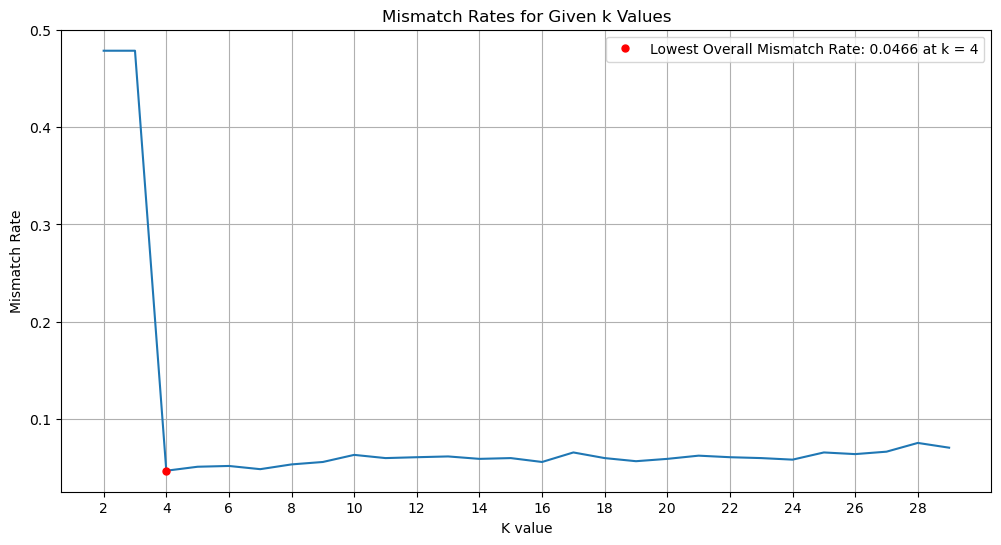

In [18]:
#| echo: false

np.random.seed(123456)

all_mm_rates = {}
for k in range(2,30):
    kmeans, kmeans_labels = spectral_clustering(L, k)

    _, df_title, overall_mm_rate = calc_mismatch_rate(labels, kmeans_labels, k)
    all_mm_rates[k] = overall_mm_rate
    print(df_title)

x = list(all_mm_rates.keys())
y = list(all_mm_rates.values())

min_y = min(y)
min_y_index = y.index(min_y)
min_k = x[min_y_index]

# print(f"The lowest mismatch rate is {min_y:.4f} which occurs at k = {min_k}.")

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(x, y)
plt.xticks(range(2, max(x)+1, 2))
plt.plot(min_k, min_y, "ro", markersize = 5, label = f"Lowest Overall Mismatch Rate: {min_y:.4f} at k = {min_k}")
plt.legend(loc = "upper right")
plt.xlabel("K value")
plt.ylabel("Mismatch Rate")
plt.title("Mismatch Rates for Given k Values")
plt.grid()
plt.show()

In [19]:
#| echo: false

kmeans_min_k, kmeans_labels = spectral_clustering(L, min_k)

df_min_k, _, _ = calc_mismatch_rate(labels, kmeans_labels, min_k)
df_min_k = df_min_k.set_index(df_min_k["Cluster"])
df_min_k = df_min_k.drop("Cluster", axis = 1)
df_min_k = df_min_k.style.set_caption(f"K = {min_k} | Overall mismatch rate = {min_y}")
df_min_k = df_min_k.format({"Mismatch Rate": "{:.4f}"})
display(df_min_k)

As seen from the code outputs and the graph above, the algorithm achieves an overall mismatch rate below 0.1 after just 3 clusters. For this particular seed, the lowest overall mismatch rate was 0.0466 which occurred at 4 clusters. This mainly means that the data can be represented with a fairly small number of clusters since there is no improvement in the mismatch rate as the number of clusters increase. According to the table, 55.4% of the data is in a cluster with a majority label 1 and 44.6% of the data is in a cluster with a majority label 0. This indicates two distinct communities which is often found in politics. The high mismatch rates in clusters 3 and 4 (45% and 43%) compared to clusters 1 and 2 (2.20% and 2.70%) indicate that these clusters contain more  difficult-to-classify data points, which suggests the underlying data structure is more complex in these regions and may require further analysis. These high mismatch rates could also represent transitional areas between the two main communities identified, where the data is less clearly separated. Overall, the results indicate that these two communities and the various blogs can be grouped separately with just a small number of clusters. 